<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Your code here
from bs4 import BeautifulSoup 
import requests 
import pandas as pd
import numpy as np 
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')  # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.5.3


Download the webpage at the url


In [3]:
#your code goes here
# get the contents of the webpage in text format and store in a variable called data
data  = requests.get(url).text 

Create a soup object


In [4]:
#your code goes here
# create a soup object using the variable 'data'
soup = BeautifulSoup(data,"html.parser")  

Scrape the `Language name` and `annual average salary`.


In [5]:
#your code goes here
#find a html table in the web page
table = soup.find('table') 
data=[]
#Get all rows from the table
for row in table.find_all('tr'): 
    # Get all columns in each row.
    cols = row.find_all('td') 
    language_name = cols[1].getText() # store the value in column 2 as language_name
    annual_avg_salary = cols[3].getText() # store the value in column 4 as annual_avg_salary
    data.append([language_name, annual_avg_salary])
    print("{}--->{}".format(language_name,annual_avg_salary))
print(data)

Language--->Average Annual Salary
Python--->$114,383
Java--->$101,013
R--->$92,037
Javascript--->$110,981
Swift--->$130,801
C++--->$113,865
C#--->$88,726
PHP--->$84,727
SQL--->$84,793
Go--->$94,082
[['Language', 'Average Annual Salary'], ['Python', '$114,383'], ['Java', '$101,013'], ['R', '$92,037'], ['Javascript', '$110,981'], ['Swift', '$130,801'], ['C++', '$113,865'], ['C#', '$88,726'], ['PHP', '$84,727'], ['SQL', '$84,793'], ['Go', '$94,082']]


Save the scrapped data into a file named *popular-languages.csv*


In [7]:
# your code goes here
df = pd.DataFrame(data)
df.to_csv('popular-languages.csv')
df1= pd.read_csv('popular-languages.csv')
df1.columns = df1.iloc[0]
df1.drop(df1.index[0], inplace = True)
df1['Average Annual Salary'] = df1['Average Annual Salary'].astype(str).str.replace('[$,]', '', regex=True)
df1['Average Annual Salary'] = pd.to_numeric(df1['Average Annual Salary'], errors='coerce')
df1.set_index('Language', inplace = True)
df2 = df1[df1.columns[1:]]

In [8]:
df2.head()

,Average Annual Salary
Language,
Python,114383
Java,101013
R,92037
Javascript,110981
Swift,130801


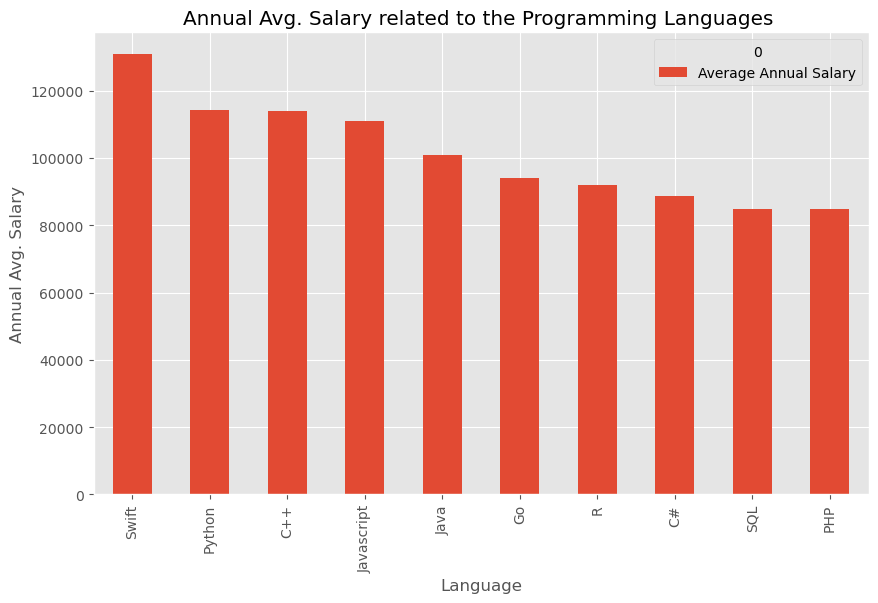

In [9]:

df2.sort_values(by=['Average Annual Salary'], ascending=False).plot(kind='bar', figsize=(10, 6))

plt.xlabel('Language') # add to x-label to the plot
plt.ylabel('Annual Avg. Salary') # add y-label to the plot
plt.title('Annual Avg. Salary related to the Programming Languages ') # add title to the plot

plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
